In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
A more complicated example:

Training label distribution: Counter({9: 6000, 0: 6000, 3: 6000, 2: 6000, 7: 6000, 5: 6000, 1: 6000, 6: 6000, 4: 6000, 8: 6000})
Training set shape: (60000, 28, 28)


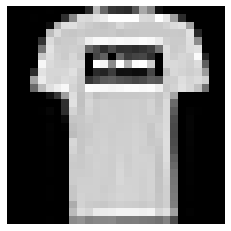

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

plt.axis('off')
plt.imshow(train_images[1],cmap='gray')

In [ ]:
num_pixels = 28 * 28  
train_images = train_images.reshape( (60000, num_pixels) ).astype(np.float32) / 255.0
test_images = test_images.reshape( (10000, num_pixels) ).astype(np.float32)  / 255.0

print('Training label distribution:', Counter(train_labels))
print('Training set shape:', train_images.shape)
print('Test set shape:', test_images.shape)

Training label distribution: Counter({9: 6000, 0: 6000, 3: 6000, 2: 6000, 7: 6000, 5: 6000, 1: 6000, 6: 6000, 4: 6000, 8: 6000})
Training set shape: (60000, 784)
Test set shape: (10000, 784)


In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(num_pixels,), name='images'), # Input layer (28*28 input nodes, one for each pixel)
    keras.layers.Dense(128, activation='relu'), # A single dense layer
    keras.layers.Dense(10, activation='softmax') # And an output layer, with 10 nodes, for the 10 classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
results = model.fit(train_images,  train_labels, batch_size=32, epochs=3, validation_split=0.1) # Splits off 10% of the training data for validation

# Predict on the test set using the trained model

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test Loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/3
1688/1688 [==============================] - 4s 2ms/step - loss: 0.6454 - accuracy: 0.7784 - val_loss: 0.4079 - val_accuracy: 0.8537
Epoch 2/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3907 - accuracy: 0.8596 - val_loss: 0.3663 - val_accuracy: 0.8658
Epoch 3/3
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3388 - accuracy: 0.8789 - val_loss: 0.3456 - val_accuracy: 0.8693
313/313 - 0s - loss: 0.3715 - accuracy: 0.8669
Test Loss: 0.371520459651947
Test accuracy: 0.8669000267982483


Class probabilities - example 1:
 [3.0844155e-06 4.2037112e-08 3.2444659e-06 5.5933555e-07 4.8409065e-06
 1.7515933e-02 8.8915958e-06 2.2961700e-02 3.4693885e-04 9.5915484e-01]
Class probabilities - example 2:
 [1.5901214e-04 1.7426208e-09 9.9200749e-01 1.0397575e-06 5.6487392e-03
 3.0104602e-10 2.1836457e-03 6.8939238e-12 1.5886897e-07 2.8586022e-11]


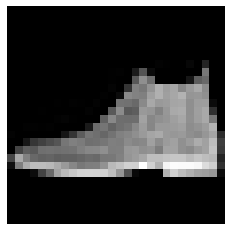

In [ ]:
predictions = model.predict(test_images[:2])
print('Class probabilities - example 1:\n', predictions[0])
print('Class probabilities - example 2:\n', predictions[1])

# Let's take a look:
plt.axis('off')
plt.imshow(test_images[0].reshape((28,28)),cmap='gray')